In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
jtplot.style()

In [66]:
data = pd.read_csv('train1.csv')

In [67]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Столбцы c отсутствующими данными:

In [69]:
nullColList = data.isnull().max()
colNull = list(nullColList[nullColList == True].index)
colNull
data[colNull].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: float64(3), object(16)
memory usage: 216.8+ KB


Как видим в признаках есть нулевые данные:
 - для категориалных мы заполним значением _nan пустые значения. после onehotclosing это будет еще один столбец
 - для числовых данных 'LotFrontage', 'MasVnrArea', 'GarageYrBlt' будем в заивисмости от смысла использовать среднее, моду или медиану. второй вариан заменим на значение -999, чтобы алгоритм мог отличать такие данные

In [70]:
#признаки с нулевыми данными и числовым типом
feat_num_null = [col for col in colNull if data[col].dtype != 'O']
#признаки с нулевыми данными и не числовым типом
feat_cat_null = [col for col in colNull if data[col].dtype == 'O']

In [71]:
feat_num_null

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Исследуюем более детално числовые признаки:

In [72]:
'LotFrontage'
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

Список уникальных значений для GarageYrBlt и 81 значение пустое. Это годы постройки гаража - не думаю, что этот признак значаимый. Призак по сути категориальный. Все NA значения заменим на -999, чтобы алгоритм дерева мог отличать такого рода значения.

In [73]:
data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [74]:
#мода
data['GarageYrBlt'].value_counts().head(1).index[0]
#d_train[num_feat].fillna(-999)

2005.0

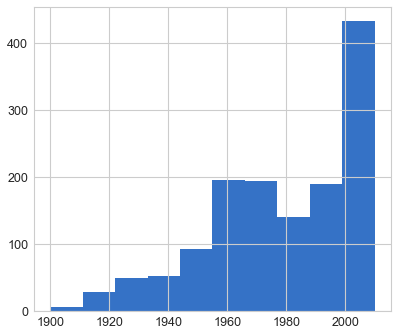

In [75]:
data['GarageYrBlt'].hist()

Список уникальных значений для MasVnrArea достаточно широк и 8 значений пустых. Судя по экпоненциальному распредению пустые значения лучше заменить на медиану, нежели рассматривать среднее значение (актуально было бы для нормального).
вторым вариантом: Все NA значения заменим на -999, чтобы алгоритм дерева мог отличать такого рода значения.

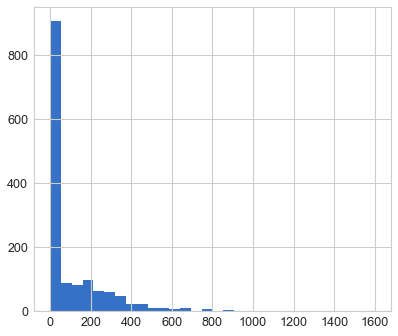

In [76]:
data['MasVnrArea'].hist(bins=30)

In [77]:
data['MasVnrArea'].median()

0.0

Список уникальных значений для LotFrontage достаточно широк и 259 значений пустых. Распределение близко к нормальному поэтому можнои испоьлзовать либо среднее, либо медиану. Так как значения целочисленные, то возьмем медиану. 
вторым вариантом: Все NA значения заменим на -999, чтобы алгоритм дерева мог отличать такого рода значения.

In [78]:
#259 значений отсутствует
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

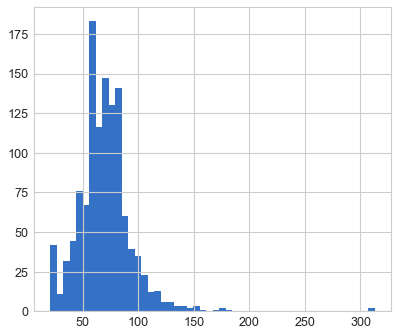

In [79]:
data['LotFrontage'].hist(bins=50)

In [80]:
data['LotFrontage'].median()

69.0

In [81]:
data['LotFrontage'].mean()

70.04995836802665

Заполним пустые значения для числовых и не числовых признаков:

In [82]:
data999 = data.copy()
datam = data.copy()

Далее мы будем рассматривать два датасета:
 - data999 с добавлением в пустые значения -999
 - datam с добавлением в пустые значения  медианного значения

In [83]:
#заполним числовые признаки с значением -999 в отдельный датает
for col in feat_num_null:
    data999.loc[data999[col].isnull(), col] = -999

In [84]:
#заполним числовые признаки с медианным значением в отдельный датает
for col in feat_num_null:
    datam.loc[datam[col].isnull(), col] = data[col].median()

In [85]:
#заполним нечисловые признаки с значением _nan
for col in feat_cat_null:
    data999.loc[data999[col].isnull(), col] = '_nan'
for col in feat_cat_null:
    datam.loc[datam[col].isnull(), col] = '_nan'

Определим категориальные (нечисловые) и числовые (непрерывные) признаки:
Из описания мы видим, что есть группа признаки с числовым типом, но это лишь коды текстовых значений. К ним относятся: 'MSSubClass', 'OverallQual', 'OverallCond' (количество уникальных значений 15, 10, 10 - соответсвтенно).

In [86]:
#так как это список имен признаков, то удалим. Также удалим целевую переменную SalePrice
excl = ['MSSubClass', 'OverallQual', 'OverallCond']
feat_cat = [col for col in data if data[col].dtype == 'O' or col in excl]
feat_num = [col for col in data if data[col].dtype != 'O' and col not in excl]
#удалим признак 'Id', так как он не несет в себе никакой информации (дублирует индексы)
feat_num.remove('Id')
#удалим признак 'Id', так как он является целевой переменной
feat_num.remove('SalePrice')

In [87]:
data999.drop("Id", axis=1, inplace=True)
datam.drop("Id", axis=1, inplace=True)

Выполним OneHotEncoding для категориальных признаков:

In [88]:
data999 = pd.get_dummies(data999, columns=feat_cat)
datam = pd.get_dummies(datam, columns=feat_cat)
#test = pd.get_dummies(test, columns=['LotShape', 'LandContour', 'Utilities'])

In [89]:
#выделим признаки и целевую переменную в соответствующие переменные X и y:
X9 = data999.copy()
X9.drop('SalePrice', axis=1, inplace=True)
y9 = data999['SalePrice'].copy()
Xm = datam.copy()
Xm.drop('SalePrice', axis=1, inplace=True)
ym = datam['SalePrice'].copy()

In [90]:
#test = data[['GarageQual','LotShape', 'LandContour', 'Utilities']].copy()
#test = pd.get_dummies(test, columns=['LotShape', 'LandContour', 'Utilities'])

Поделим исходные датасеты (999 и m) на тренировочную и тестовые выборки:

In [91]:
from sklearn.model_selection import train_test_split

X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=0)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.3, random_state=0)


Оценим значимость признаков (в большей степени для этого и использовали одиноное дерево):
    - BsmtQual (низкий)
    - ExterQual (низкий)
    - OverallQual (очень низкий)
    - GarageCars (очень значимый)
    - GrLivArea (значимый)
    - 1stFlrSF (очень низкий)
    - TotalBsmtSF (очень низкий)
    - YearBlt (низкий)
    - LotArea (Оочень низчкий)
Значимость остальных признаком блика к нулю.

Применим метод слаучайного леса для построения регрессии:

In [92]:
from sklearn.ensemble import RandomForestRegressor

rfr9 = RandomForestRegressor(max_depth=4, min_samples_leaf=9)
rfr9.fit(X9_train, y9_train)
rfr_m = RandomForestRegressor(max_depth=4, min_samples_leaf=9)
rfr_m.fit(Xm_train, ym_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=9)

Оценим результаты:
    - При использовании параметров по умолчанию видим, что оценка R2 для тестовой и тренировочной выборки сильно отличаются 0.85(тест) против 0.97 (тренировочная)
    - Поробуем подобрать параметры. при снижении при снижении максимальной глубины точность модели падает, но при этом разность оценки R2 для моделей между тестововй и тренировочной выборками сокращается. значение маскмаьлной глубины 4 оказалось отимальным
    - далее попробовали уменьшить минимально количество данных в листьях дерева до 9. получили небольшой прирост в качестве и еще немного сократили разность между R2 для тестовой и тренировочный выборок

Итого: оценка качества R2 для тестовой выборки 0.81, для тренировочной - 0.83. Для версии с медианой результаты чуть лучше.

In [93]:
print('Score of Randoм Forest Regression for set 999: ')
print(
    'Test data: ', rfr9.score(X9_test, y9_test), ', Train data: ', rfr9.score(X9_train, y9_train)) 

Score of Randoм Forest Regression for set 999: 
Test data:  0.816421014206884 , Train data:  0.8424407369635497


In [94]:
print('Score for set median: ')
print(
    'Test data: ', rfr_m.score(Xm_test, ym_test), ', Train data: ', rfr_m.score(Xm_train, ym_train))

Score for set median: 
Test data:  0.815204947112251 , Train data:  0.8381534144990367


Оценим занчимость признаков: значимость признаков, выявленных при дереве решений те же, но также проявилась значимость других признаков. И это понятно, так как выбираются не все признаки разом, а группами, что позволяет выявить их влияние на фоне меньего количества (в грппе каждого дерева) менее значимых признаков.

In [95]:
#только для модели с суффиксом m (числовые пустуе значения заполняются медианой)
feat_imp = np.hstack((rfr_m.feature_importances_.reshape(-1, 1), Xm.columns.ravel().reshape(-1,1)))

In [96]:
FI = feat_imp[feat_imp[:,0]>0.005]

In [97]:
FI

array([[0.006746403992762848, 'LotArea'],
       [0.06737748018239173, 'YearBuilt'],
       [0.010612208947859718, 'YearRemodAdd'],
       [0.0198159441936584, 'BsmtFinSF1'],
       [0.04275210551899567, 'TotalBsmtSF'],
       [0.04003541451408914, '1stFlrSF'],
       [0.3010515677405757, 'GrLivArea'],
       [0.31171058544071345, 'GarageCars'],
       [0.013348259654618983, 'GarageArea'],
       [0.01815550491042845, 'OverallQual_8'],
       [0.040953419057878804, 'ExterQual_TA'],
       [0.06508270410550131, 'BsmtQual_Ex'],
       [0.0053105972129087456, 'KitchenQual_Ex'],
       [0.006357547987458909, 'KitchenQual_TA']], dtype=object)

([<matplotlib.axis.YTick at 0x27e0010f708>,
 <a list of 14 Text yticklabel objects>)

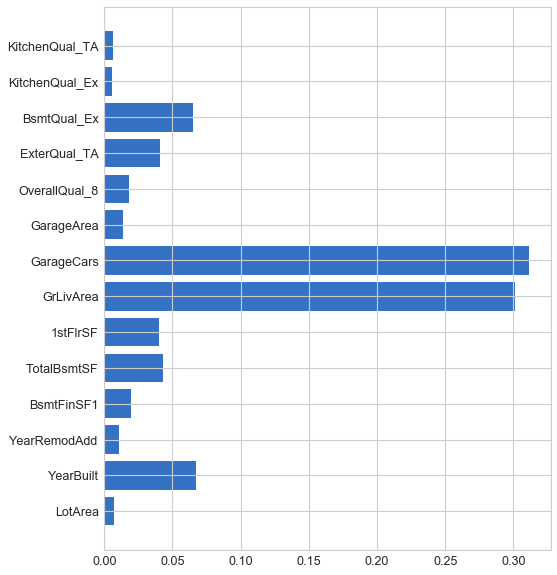

In [98]:
plt.figure(figsize=(8, 10))
plt.barh(np.arange(len(FI)), FI[:,0])
plt.yticks(np.arange(len(FI)),FI[:,1])

Попробуем применить стеккинг

In [99]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import GridSearchCV

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xm_train[feat_num])

Xm_train[feat_num] = scaler.transform(Xm_train[feat_num])
Xm_test[feat_num] = scaler.transform(Xm_test[feat_num])

C:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [101]:
Stacking_Regressor = StackingRegressor(
    [
        ('linr', LinearRegression()),
        ('svr', SVR()),
        ('rf', RandomForestRegressor(max_depth=4, min_samples_leaf=9, random_state=42))
    ],
RandomForestRegressor())

In [102]:
Stacking_Regressor.fit(Xm_train, ym_train)

StackingRegressor(estimators=[('linr', LinearRegression()), ('svr', SVR()),
                              ('rf',
                               RandomForestRegressor(max_depth=4,
                                                     min_samples_leaf=9,
                                                     random_state=42))],
                  final_estimator=RandomForestRegressor())

In [103]:
print(
    ' r2 score for stacking regression model: ', Stacking_Regressor.score(Xm_test, ym_test),
    '\n r2 score for linear regression model: ', Stacking_Regressor.named_estimators_['linr'].score(Xm_test, ym_test),
    '\n r2 score for Random Forest regression model: ', Stacking_Regressor.named_estimators_['rf'].score(Xm_test, ym_test),
    '\n r2 score for Support Vector regression model: ', Stacking_Regressor.named_estimators_['svr'].score(Xm_test, ym_test)
)

 r2 score for stacking regression model:  0.852274192645025 
 r2 score for linear regression model:  -2.119690466253054e+19 
 r2 score for Random Forest regression model:  0.8121900569463617 
 r2 score for Support Vector regression model:  -0.05058144967412703


Как видим применение стэккинга улучшило результат R2 модели с 0.81 до 0.84. Также видны сильно более худшие результаты по R2 у моделей по отдельности.

Попробуем применить к нашей модели кросс валидацию на первом уровне c количеством фолдов 10. Для этого воспользуемся библиотекой mlxtend. Она должна дать более точную оценку нашей модели (на небольшом датасете точность оценки может страдать). для случайного леса оценка из предыдщего расчета оказалась более оптимистично, чем на самом деле. зато для стэкинга в прошлом варианте оценка оказалась более пессимистично, но пр кросс валидации он выше - 0.87 (кросс-валидация и так реализована в стэкинге, поэотму страно что оценка оплучилась выше) 

In [104]:
linr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor(max_depth=4, min_samples_leaf=9, random_state=42)
stack = StackingCVRegressor(regressors=(linr, svr, rf),
                            meta_regressor=RandomForestRegressor(),
                            random_state=42)

for rg, label in zip([linr, svr, rf, stack], ['Linear', 'SVR','Random Forest', 'StackingCVRegressor']):
    scores = cross_val_score(rg, Xm_train, ym_train, cv=10)
    print("R2 Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

R2 Score: -18067295381176954880.00 (+/- 25582101505297211392.00) [Linear]
R2 Score: -0.06 (+/- 0.06) [SVR]
R2 Score: 0.79 (+/- 0.05) [Random Forest]
R2 Score: 0.87 (+/- 0.03) [StackingCVRegressor]
